# Analyzing Mental Health Discourse during the Covid Pandemic

## Overall Project Description

### The purpose of this project is to examine public posts about symptoms related to anxiety, depression, and covid throughout the rise of the Covid-19 pandemic (i.e., from 11-01-2019 to 07-31-2020). 

### The data were scraped from the Anxiety Disorder, Depression, and Covid forums on Patient.Info using Scrapy. In these forums, individuals post about their symptoms and receive responses from community members who vary in levels of expertise. The dataset includes the date of the original post, the number of followers, likes, and replies, as well as the post text, the post title, and the reply text.

### The primary goals of the project were to compare posts that either included discourse about covid or did not include discourse about covid and to examine relative frequencies of posts throughout the rise of the covid pandemic. The results of these analyses can be used by doctors and hospitals to enhance communication with patients who may be experiencing anxiety or depression related to Covid-19. Effective communication with patients can increase patient satisfaction.

# Important packages and read the data

In [4]:
import numpy as np
import pandas as pd
from scipy import stats
from sklearn import datasets
import re

In [5]:
patient = pd.read_csv('patient.csv')

In [6]:
import nltk

# Uncomment the following line the first time you run the code
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sjk252/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/sjk252/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [7]:
patient.shape

(1730, 10)

In [8]:
patient.dtypes

group            object
num_following     int64
num_replies       int64
post_date        object
post_likes        int64
post_text        object
post_title       object
post_user        object
reply_text       object
reply_user       object
dtype: object

# Clean the data and prepare text for analysis using natural language processing 

### Use of Natural Language Processing

In [9]:
patient['reply_text'] = patient['reply_text'].fillna('')
# Replace `removed` and `deleted` with empty string
tbr = ['[removed]', '[deleted]']
patient['reply_text'] = patient['reply_text'].apply(lambda x: '' if x in tbr else x)

In [10]:
patient['reply_user'] = patient['reply_user'].fillna('')
# Replace `removed` and `deleted` with empty string
tbr = ['[removed]', '[deleted]']
patient['reply_user'] = patient['reply_user'].apply(lambda x: '' if x in tbr else x)

In [11]:
patient['post_text'] = patient['post_text'].fillna('')
# Replace `removed` and `deleted` with empty string
tbr = ['[removed]', '[deleted]']
patient['post_text'] = patient['post_text'].apply(lambda x: '' if x in tbr else x)

In [12]:
print(sum(patient['reply_text'] == '') / patient.shape[0]) #proportion data that is missing

0.0815028901734104


In [13]:
print(sum(patient['post_text'] == '') / patient.shape[0])

0.0011560693641618498


In [14]:
patient['reply_text'] = patient['post_title'] + ' ' + patient['reply_text']

In [15]:
patient['post_text'] = patient['post_title'] + ' ' + patient['post_text']

In [16]:
print(sum(patient['post_text'] == '') / patient.shape[0])

0.0


In [17]:
import re

# Convert all the string to lower cases
patient['post_text'] = patient['post_text'].str.lower()
# \S+ means anything that is not an empty space
patient['post_text'] = patient['post_text'].apply(lambda x: re.sub('http\S*', '', x))
# \s+ means all empty space (\n, \r, \t)
patient['post_text'] = patient['post_text'].apply(lambda x: re.sub('\s+', ' ', x))

In [18]:
patient['post_text'] = patient['post_text'].apply(lambda x: re.sub('[^\w\s]', '', x))

In [19]:
# Convert all the string to lower cases
patient['reply_text'] = patient['reply_text'].str.lower()
# \S+ means anything that is not an empty space
patient['reply_text'] = patient['reply_text'].apply(lambda x: re.sub('http\S*', '', x))
# \s+ means all empty space (\n, \r, \t)
patient['reply_text'] = patient['reply_text'].apply(lambda x: re.sub('\s+', ' ', x))

## Create new fields in the dataframe to code for posts that include covid-related discourse

In [20]:
patient['covid'] = patient['post_text'].str.contains("covid | coronavirus | pandemic | quarantine | shutdown | cases | contagious | virus | corona | tested", na=False)*1

In [21]:
patient['covid_reply'] = patient['reply_text'].str.contains("covid | coronavirus | pandemic | quarantine | shutdown | cases | contagious | virus | corona | tested", na=False)*1

## Apply similar text-cleaning and coding to post titles

In [22]:
patient['post_title'] = patient['post_title'].fillna('')
# Replace `removed` and `deleted` with empty string
tbr = ['[removed]', '[deleted]']
patient['post_title'] = patient['post_title'].apply(lambda x: '' if x in tbr else x)

In [23]:
# Convert all the string to lower cases
patient['post_title'] = patient['post_title'].str.lower()
# \S+ means anything that is not an empty space
patient['post_title'] = patient['post_title'].apply(lambda x: re.sub('http\S*', '', x))
# \s+ means all empty space (\n, \r, \t)
patient['post_title'] = patient['post_title'].apply(lambda x: re.sub('\s+', ' ', x))

In [24]:
patient['covid_title'] = patient['post_title'].str.contains("covid | coronavirus | pandemic | quarantine | shutdown | cases | contagious | virus | corona | tested", na=False)*1

In [25]:
patient.sample(10)

,group,num_following,num_replies,post_date,post_likes,post_text,post_title,post_user,reply_text,reply_user,covid,covid_reply,covid_title
1264,Depression,22,46,4/19/20,1,i had to put my cat down and i cant stop cryin...,i had to put my cat down and i can't stop crying,kenz43,i had to put my cat down and i can't stop cryi...,"susan45954,kenz43,audrey96558,kenz43,audrey965...",0,0,0
13,Anxiety Disorders,3,6,5/2/20,0,scary symptom of skipping heartbeats hi therei...,scary symptom of skipping heartbeats,anahita.p,scary symptom of skipping heartbeats [['if you...,"jan34534,anahita.p,jan34534,anahita.p,Jack2001...",0,0,0
1400,Depression,6,9,9/1/19,0,my father killed my cat and im drowning in gui...,my father killed my cat and i'm drowning in guilt,angel-baby,my father killed my cat and i'm drowning in gu...,"zarina1979,angel-baby,d_28417,angel-baby,sam18...",0,0,0
469,Anxiety Disorders,5,4,3/11/20,0,brain fog from anxiety or depression i wrote a...,brain fog from anxiety or depression??,marissa72768,brain fog from anxiety or depression?? [['i ha...,"KM1990,james82283,crispy76,bbdanielle",0,0,0
228,Anxiety Disorders,2,1,4/20/20,0,pulse in my ears what the heck sooo to add to ...,pulse in my ears???? what the heck,bbdanielle,pulse in my ears???? what the heck [['yep !! t...,lee27mcgoo,0,0,0
1188,Coronavirus (COVID-19),10,7,4/25/20,0,feeling worse after 3 weeks of symptoms hellom...,feeling worse after 3 weeks of symptoms,Dolsen1413,"feeling worse after 3 weeks of symptoms [[""i t...","julie97362,steffi309,jan34534,cotswoldgal,stef...",0,1,0
1311,Depression,2,1,1/4/20,1,depressed whats the reason hi allim 24 and hav...,"depressed, what's the reason?",ross101,"depressed, what's the reason? [['since you wer...",diane98246,0,0,0
1514,Anxiety Disorders,2,1,7/29/20,0,heart stopping have have acid reflux bad and l...,heart stopping,mary91559,heart stopping [['your heart is not going to s...,jan34534,0,0,0
1114,Anxiety Disorders,4,3,12/17/19,0,my boyfriend of 4 years left me because i have...,my boyfriend of 4 years left me because i have...,agne44934,my boyfriend of 4 years left me because i have...,"jan34534,kelly55079,Amz87",0,0,0
461,Anxiety Disorders,4,7,3/10/20,0,is this anxiety related my brain feels broken ...,is this anxiety related,christophe78706,is this anxiety related [['i know 100% how you...,"KM1990,christophe78706,KM1990,christophe78706,...",0,0,0


## Create datetime field and filter data by date

### Only include dates that span the covid pandemic

In [26]:
import datetime
from datetime import date

In [27]:
patient["datetime"] = pd.to_datetime(patient.post_date, format='%m/%d/%y').dt.date
patient['datetime'] = pd.to_datetime(patient['datetime'])

In [28]:
mask = (patient['datetime'] > "2019-11-01") & (patient['datetime'] <= "2020-07-31")
filtered_dates = patient.loc[mask].reset_index(drop = True)

In [29]:
filtered_dates["year"] = filtered_dates['datetime'].dt.year

In [30]:
filtered_dates["month"] = filtered_dates['datetime'].dt.month

# Word Cloud Visualization

### Import packages and create additional stopwords

In [31]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from wordcloud import WordCloud
from matplotlib import pyplot as plt
stopwords = set(STOPWORDS)
stopwords.update(["im", "anxiety", "feel", "feeling", "now", "going", "anyone", "really", "know", "ive",
                 "still","time", "started", "think", "even", "back", "thing", "got", "go", "week", "day",
                 "felt", "one", "something", "went", "feels","cant","dont","ex","year", "said", "things"])

### Create groups within the forums in preparation for word clouds

In [32]:
noncovid_anxiety = filtered_dates[(filtered_dates['covid']==0) & (filtered_dates['group'] == 'Anxiety Disorders')]
covid_anxiety = filtered_dates[(filtered_dates['covid']==1) & (filtered_dates['group'] == 'Anxiety Disorders')]
covid_group = filtered_dates[(filtered_dates['group'] == 'Coronavirus (COVID-19)')]
depression_group = filtered_dates[(filtered_dates['group'] == 'Depression')]
depression_group_covid = filtered_dates[(filtered_dates['group'] == 'Depression')&(filtered_dates['covid'] == 1)]
depression_group_noncovid = filtered_dates[(filtered_dates['group'] == 'Depression')&(filtered_dates['covid'] == 0)]

## Create Word Clouds

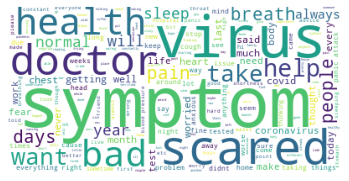

In [58]:
# word cloud for anxiety posts that include covid-related discourse
anxietycovid_wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(' '.join(covid_anxiety['post_text']))
plt.imshow(anxietycovid_wordcloud)
plt.axis("off")
plt.show()

In [59]:
anxietycovid_wordcloud.to_file("anxietycovid_wordcloud.png")

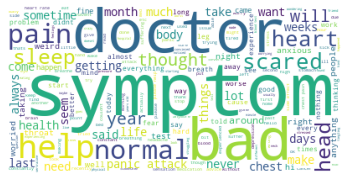

In [60]:
# word cloud for anxiety posts that do not include covid-related discourse
anxietynoncovid_wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(' '.join(list(map(str, noncovid_anxiety['post_text']))))
plt.imshow(anxietynoncovid_wordcloud)
plt.axis("off")
plt.show()

In [61]:
anxietynoncovid_wordcloud.to_file("anxietynoncovid_wordcloud.png")

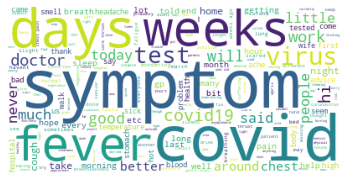

In [63]:
# word cloud for posts in the covid forum
covidgroup_wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(' '.join(list(map(str, covid_group['post_text']))))
plt.imshow(covidgroup_wordcloud)
plt.axis("off")
plt.show()

In [64]:
covidgroup_wordcloud.to_file("covidgroup_wordcloud.png")

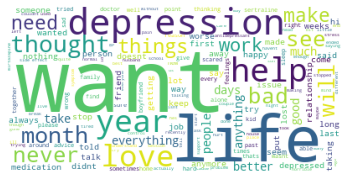

In [66]:
# word cloud for all depression posts 
depressiongroup_wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(' '.join(list(map(str, depression_group['post_text']))))
plt.imshow(depressiongroup_wordcloud)
plt.axis("off")
plt.show()

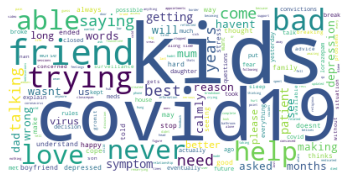

In [77]:
# word cloud for depression posts that include covid-related discourse
depressiongroupcovid_wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(' '.join(list(map(str, depression_group_covid['post_text']))))
plt.imshow(depressiongroupcovid_wordcloud)
plt.axis("off")
plt.show()

In [78]:
depressiongroupcovid_wordcloud.to_file("depressiongroupcovid_wordcloud.png")

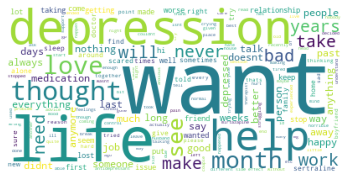

In [80]:
# word cloud for depression posts that do not include covid-related discourse
depressiongroupnoncovid_wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(' '.join(list(map(str, depression_group_noncovid['post_text']))))
plt.imshow(depressiongroupnoncovid_wordcloud)
plt.axis("off")
plt.show()

In [81]:
depressiongroupnoncovid_wordcloud.to_file("depressiongroupnoncovid_wordcloud.png")

# t-tests comparing num followed, replies, likes

In [34]:
from scipy.stats import ttest_ind

noncovid_group = filtered_dates[filtered_dates['covid']==0]
covid_group = filtered_dates[filtered_dates['covid']==1]

ttest_ind(covid_group['num_replies'], noncovid_group['num_replies'])

Ttest_indResult(statistic=-1.2651051584712332, pvalue=0.2060208924868537)

In [35]:
ttest_ind(covid_group['post_likes'], noncovid_group['post_likes'])

Ttest_indResult(statistic=-1.114033943215936, pvalue=0.2654347082315449)

In [36]:
ttest_ind(covid_group['num_following'], noncovid_group['num_following'])

Ttest_indResult(statistic=-1.084889478501492, pvalue=0.27813674498390994)

In [88]:
noncovid_anxiety = filtered_dates[(filtered_dates['covid']==0) & (filtered_dates['group'] == 'Anxiety Disorders')]
covid_anxiety = filtered_dates[(filtered_dates['covid']==1) & (filtered_dates['group'] == 'Anxiety Disorders')]

print(ttest_ind(covid_anxiety['num_replies'], noncovid_anxiety['num_replies']))
print(ttest_ind(covid_anxiety['post_likes'], noncovid_anxiety['post_likes']))
print(ttest_ind(covid_anxiety['num_following'], noncovid_anxiety['num_following']))

Ttest_indResult(statistic=-0.6800294295528695, pvalue=0.4966073714786843)
Ttest_indResult(statistic=-0.8207188103113271, pvalue=0.41195750112852314)
Ttest_indResult(statistic=-0.6421403993344645, pvalue=0.5208956801930482)


In [38]:
covid_group = filtered_dates[(filtered_dates['group'] == 'Coronavirus (COVID-19)')]
depression_group = filtered_dates[(filtered_dates['group'] == 'Depression')]
depression_group_covid = filtered_dates[(filtered_dates['group'] == 'Depression')&(filtered_dates['covid'] == 1)]
depression_group_noncovid = filtered_dates[(filtered_dates['group'] == 'Depression')&(filtered_dates['covid'] == 0)]

# Chi-square tests comparing key words that differed between covid vs. non-covid posts within the anxiety and depression forums

In [33]:
filtered_dates['scared'] = filtered_dates['post_text'].str.contains("scared", na=False)*1
filtered_dates['health'] = filtered_dates['post_text'].str.contains("health", na=False)*1
filtered_dates['breath'] = filtered_dates['post_text'].str.contains("breath", na=False)*1
filtered_dates['help'] = filtered_dates['post_text'].str.contains("help", na=False)*1
filtered_dates['pain'] = filtered_dates['post_text'].str.contains("pain", na=False)*1
filtered_dates['bad'] = filtered_dates['post_text'].str.contains("bad", na=False)*1
filtered_dates['doctor'] = filtered_dates['post_text'].str.contains("doctor", na=False)*1
filtered_dates['heart'] = filtered_dates['post_text'].str.contains("heart", na=False)*1
filtered_dates['kids'] = filtered_dates['post_text'].str.contains("kids", na=False)*1
filtered_dates['depression'] = filtered_dates['post_text'].str.contains("depression", na=False)*1
filtered_dates['life'] = filtered_dates['post_text'].str.contains("life", na=False)*1
filtered_dates['thought'] = filtered_dates['post_text'].str.contains("thought", na=False)*1

In [83]:
group_forum = filtered_dates.groupby(['group'])
print(group_forum.covid.count())
print(group_forum.covid.sum())
print(group_forum.covid.count() - group_forum.covid.sum())

group
Anxiety Disorders         1297
Coronavirus (COVID-19)      99
Depression                 180
Name: covid, dtype: int64
group
Anxiety Disorders         170
Coronavirus (COVID-19)     65
Depression                  5
Name: covid, dtype: int64
group
Anxiety Disorders         1127
Coronavirus (COVID-19)      34
Depression                 175
Name: covid, dtype: int64


## Chi-square tests for Anxiety posts

In [101]:
print(covid_anxiety['scared'].agg(['sum']))
print(noncovid_anxiety['scared'].agg(['sum']))
print(covid_anxiety['scared'].agg('count') - covid_anxiety['scared'].agg('sum'))
print(noncovid_anxiety['scared'].agg('count') - noncovid_anxiety['scared'].agg('sum'))

sum    52
Name: scared, dtype: int64
sum    204
Name: scared, dtype: int64
118
923


In [90]:
#[[covid-scared, 52], [non-covid-scared, 204]]
#[[covid-non-scared, 118], [non-covid-non-scared, 923]]

In [87]:
obs_scared_anxiety = np.array([[52,204], [118,923]])
chi2, p, dof, expected = stats.chi2_contingency(obs_scared_anxiety)
print(chi2, p, dof, expected) #significant

13.761775925291682 0.00020751582604582844 1 [[ 33.55435621 222.44564379]
 [136.44564379 904.55435621]]


In [100]:
print(covid_anxiety['health'].agg(['sum']))
print(noncovid_anxiety['health'].agg(['sum']))
print(covid_anxiety['health'].agg('count') - covid_anxiety['health'].agg('sum'))
print(noncovid_anxiety['health'].agg('count') - noncovid_anxiety['health'].agg('sum'))

sum    73
Name: health, dtype: int64
sum    261
Name: health, dtype: int64
97
866


In [ ]:
#[[covid-health, 73], [non-covid-health, 261]]
#[[covid-non-health, 97], [non-covid-non-health, 866]]

In [92]:
obs_health_anxiety = np.array([[73,261], [97,866]])
chi2, p, dof, expected = stats.chi2_contingency(obs_health_anxiety)
print(chi2, p, dof, expected) #significant

29.208229441350618 6.500253324000183e-08 1 [[ 43.77794911 290.22205089]
 [126.22205089 836.77794911]]


In [93]:
print(covid_anxiety['breath'].agg(['sum']))
print(noncovid_anxiety['breath'].agg(['sum']))
print(covid_anxiety['breath'].agg('count') - covid_anxiety['breath'].agg('sum'))
print(noncovid_anxiety['breath'].agg('count') - noncovid_anxiety['breath'].agg('sum'))

count    170
sum       59
Name: breath, dtype: int64
count    1127
sum       184
Name: breath, dtype: int64


In [ ]:
#[[covid-breath, 59], [non-covid-breath, 184]]
#[[covid-non-breath, 111], [non-covid-non-breath, 943]]

In [94]:
obs_breath_anxiety = np.array([[59,184], [111,943]])
chi2, p, dof, expected = stats.chi2_contingency(obs_breath_anxiety)
print(chi2, p, dof, expected) #significant

31.577723085356578 1.916151658008272e-08 1 [[ 31.85042406 211.14957594]
 [138.14957594 915.85042406]]


In [102]:
print(covid_anxiety['help'].agg(['sum']))
print(noncovid_anxiety['help'].agg(['sum']))
print(covid_anxiety['help'].agg('count') - covid_anxiety['help'].agg('sum'))
print(noncovid_anxiety['help'].agg('count') - noncovid_anxiety['help'].agg('sum'))

sum    62
Name: help, dtype: int64
sum    390
Name: help, dtype: int64
108
737


In [ ]:
#[[covid-help, 62], [non-covid-help, 390]]
#[[covid-non-help, 108], [non-covid-non-help, 737]]

In [104]:
obs_help_anxiety = np.array([[62,390], [108,737]])
chi2, p, dof, expected = stats.chi2_contingency(obs_help_anxiety)
print(chi2, p, dof, expected) #not significant

0.1516953260616957 0.6969204801593534 1 [[ 59.24441018 392.75558982]
 [110.75558982 734.24441018]]


In [105]:
print(covid_anxiety['pain'].agg(['sum']))
print(noncovid_anxiety['pain'].agg(['sum']))
print(covid_anxiety['pain'].agg('count') - covid_anxiety['pain'].agg('sum'))
print(noncovid_anxiety['pain'].agg('count') - noncovid_anxiety['pain'].agg('sum'))

sum    36
Name: pain, dtype: int64
sum    214
Name: pain, dtype: int64
134
913


In [ ]:
#[[covid-pain, 36], [non-covid-pain, 214]]
#[[covid-non-pain, 134], [non-covid-non-pain, 913]]

In [106]:
obs_pain_anxiety = np.array([[36,214], [134,913]])
chi2, p, dof, expected = stats.chi2_contingency(obs_pain_anxiety)
print(chi2, p, dof, expected) #not significant

0.324747130659914 0.5687686626383522 1 [[ 32.76792598 217.23207402]
 [137.23207402 909.76792598]]


In [107]:
print(covid_anxiety['bad'].agg(['sum']))
print(noncovid_anxiety['bad'].agg(['sum']))
print(covid_anxiety['bad'].agg('count') - covid_anxiety['bad'].agg('sum'))
print(noncovid_anxiety['bad'].agg('count') - noncovid_anxiety['bad'].agg('sum'))

sum    49
Name: bad, dtype: int64
sum    259
Name: bad, dtype: int64
121
868


In [ ]:
#[[covid-bad, 49], [non-covid-bad, 259]]
#[[covid-non-bad, 121], [non-covid-non-bad, 868]]

In [108]:
obs_bad_anxiety = np.array([[49,259], [121,868]])
chi2, p, dof, expected = stats.chi2_contingency(obs_bad_anxiety)
print(chi2, p, dof, expected) #not significant

2.47099640105854 0.11596439024904298 1 [[ 40.37008481 267.62991519]
 [129.62991519 859.37008481]]


In [109]:
print(covid_anxiety['doctor'].agg(['sum']))
print(noncovid_anxiety['doctor'].agg(['sum']))
print(covid_anxiety['doctor'].agg('count') - covid_anxiety['doctor'].agg('sum'))
print(noncovid_anxiety['doctor'].agg('count') - noncovid_anxiety['doctor'].agg('sum'))

sum    60
Name: doctor, dtype: int64
sum    252
Name: doctor, dtype: int64
110
875


In [ ]:
#[[covid-doctor, 60], [non-covid-doctor, 252]]
#[[covid-non-doctor, 110], [non-covid-non-doctor, 875]]

In [113]:
obs_doctor_anxiety = np.array([[60,252], [110,875]])
chi2, p, dof, expected = stats.chi2_contingency(obs_doctor_anxiety)
print(chi2, p, dof, expected) #significant

12.82758646212249 0.0003415460409765731 1 [[ 40.89437163 271.10562837]
 [129.10562837 855.89437163]]


## NOTE - depression group only has a max of 5 covid posts, so assumptions for chi-square are violated when subsetting

In [114]:
print(depression_group_covid['kids'].agg(['sum']))
print(depression_group_noncovid['kids'].agg(['sum']))
print(depression_group_covid['kids'].agg('count') - depression_group_covid['kids'].agg('sum'))
print(depression_group_noncovid['kids'].agg('count') - depression_group_noncovid['kids'].agg('sum'))

sum    2
Name: kids, dtype: int64
sum    9
Name: kids, dtype: int64
3
166


### Summary: People are more likely to talk about covid and related health concerns in association with anxiety rather than depression

# DATE TRENDS

## Prepare the data for date trend plots

### Group data by forum, year, month and run descriptives

In [62]:
# Group data by year and month
filtereddates_groupyearmonth = filtered_dates.groupby(['group', 'year', 'month'])
filtereddates_groupyearmonth

In [63]:
# Create data set containing descriptive statistics for month/year
# Note that count is the total number of posts in the forum during a specific time period 
desc_by_date = filtereddates_groupyearmonth.agg(['count', 'sum', 'mean'])
desc_by_date.head(20)

num_following                  num_replies  \
                                          count   sum       mean       count   
group                  year month                                              
Anxiety Disorders      2019 11               54   218   4.037037          54   
                            12              199   791   3.974874         199   
                       2020 1               165   519   3.145455         165   
                            2               111   450   4.054054         111   
                            3               159   769   4.836478         159   
                            4               196  1438   7.336735         196   
                            5               168  1065   6.339286         168   
                            6               141   762   5.404255         141   
                            7               104   532   5.115385         104   
Coronavirus (COVID-19) 2020 4                22    89   4.045455          22   
                            5                43   157   3.651163          43   
                            6                26    60   2.307692          26   
                            7                 8    43   5.375000           8   
Depression             2019 11               32   135   4.218750          32   
                            12               22   102   4.636364          22   
                       2020 1                30   127   4.233333          30   
                            2                22    98   4.454545          22   
                            3                24    94   3.916667          24   
                            4                14   239  17.071429          14   
                            5                20   102   5.100000          20   

                                                   post_likes                 \
                                    sum       mean      count  sum      mean   
group                  year month                                              
Anxiety Disorders      2019 11      347   6.425926         54   13  0.240741   
                            12     1038   5.216080        199   36  0.180905   
                       2020 1       548   3.321212        165   13  0.078788   
                            2       597   5.378378        111   23  0.207207   
                            3      1034   6.503145        159   36  0.226415   
                            4      2146  10.948980        196  100  0.510204   
                            5      1613   9.601190        168   55  0.327381   
                            6      1188   8.425532        141   43  0.304965   
                            7       818   7.865385        104   30  0.288462   
Coronavirus (COVID-19) 2020 4        65   2.954545         22   11  0.500000   
                            5       175   4.069767         43    5  0.116279   
                            6        39   1.500000         26    4  0.153846   
                            7        52   6.500000          8    2  0.250000   
Depression             2019 11      168   5.250000         32   28  0.875000   
                            12      110   5.000000         22   10  0.454545   
                       2020 1       166   5.533333         30   15  0.500000   
                            2        94   4.272727         22    5  0.227273   
                            3       124   5.166667         24   10  0.416667   
                            4       482  34.428571         14   39  2.785714   
                            5       103   5.150000         20    8  0.400000   

                                  covid  ...      kids depression      \
                                  count  ...      mean      count sum   
group                  year month        ...                            
Anxiety Disorders      2019 11       54  ...  0.000000         54   1   
                            12      199  ...  0.000000      

### Create one column name for each column and reset the index

In [64]:
desc_by_date.columns = list(map(lambda x:'_'.join(x), desc_by_date.columns))

In [65]:
desc_by_date = desc_by_date.reset_index()

In [66]:
desc_by_date["year_month"] = desc_by_date['month'].map(str) + '-' + desc_by_date['year'].map(str)

In [67]:
desc_by_date.columns

Index(['group', 'year', 'month', 'num_following_count', 'num_following_sum',
       'num_following_mean', 'num_replies_count', 'num_replies_sum',
       'num_replies_mean', 'post_likes_count', 'post_likes_sum',
       'post_likes_mean', 'covid_count', 'covid_sum', 'covid_mean',
       'covid_reply_count', 'covid_reply_sum', 'covid_reply_mean',
       'covid_title_count', 'covid_title_sum', 'covid_title_mean',
       'scared_count', 'scared_sum', 'scared_mean', 'health_count',
       'health_sum', 'health_mean', 'breath_count', 'breath_sum',
       'breath_mean', 'help_count', 'help_sum', 'help_mean', 'pain_count',
       'pain_sum', 'pain_mean', 'bad_count', 'bad_sum', 'bad_mean',
       'doctor_count', 'doctor_sum', 'doctor_mean', 'heart_count', 'heart_sum',
       'heart_mean', 'kids_count', 'kids_sum', 'kids_mean', 'depression_count',
       'depression_sum', 'depression_mean', 'life_count', 'life_sum',
       'life_mean', 'thought_count', 'thought_sum', 'thought_mean',
       'year

### Create forum groups for plots

In [68]:
anxiety_date_group = desc_by_date[(desc_by_date['group'] == 'Anxiety Disorders')]
depression_date_group = desc_by_date[(desc_by_date['group'] == 'Depression')]
covid_date_group = desc_by_date[(desc_by_date['group'] == 'Coronavirus (COVID-19)')]

## Plots for visualizing changes in posts throughout the covid pandemic

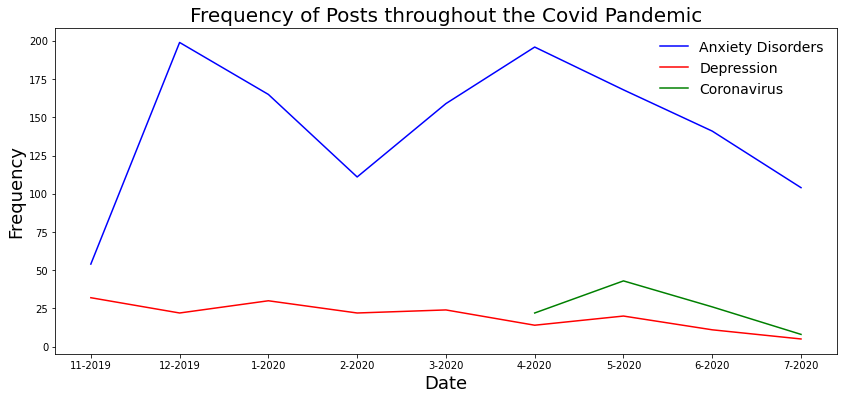

In [69]:
plt.figure(figsize=(14,6))
plt.plot(anxiety_date_group['year_month'], anxiety_date_group['num_following_count'], "b", label = "Anxiety Disorders")
plt.plot(depression_date_group['year_month'], depression_date_group['num_following_count'], "r", label = "Depression")
plt.plot(covid_date_group['year_month'], covid_date_group['num_following_count'], "g", label = "Coronavirus")
plt.legend(frameon=False, fontsize=14)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.title("Frequency of Posts throughout the Covid Pandemic", fontsize=20)
plt.show()

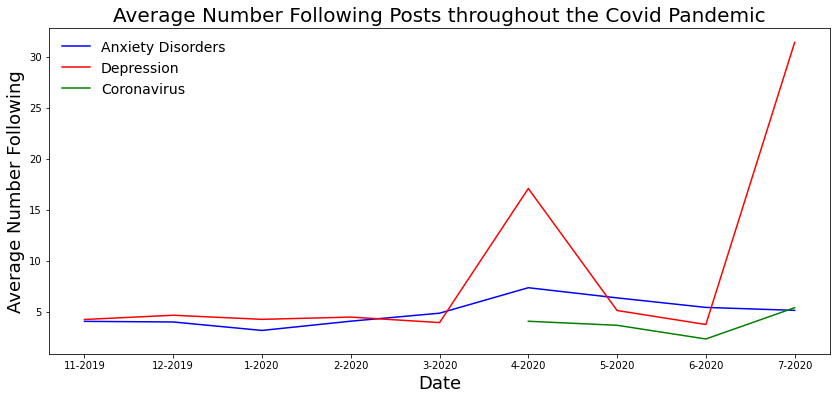

In [70]:
plt.figure(figsize=(14,6))
plt.plot(anxiety_date_group['year_month'], anxiety_date_group['num_following_mean'], "b", label = "Anxiety Disorders")
plt.plot(depression_date_group['year_month'], depression_date_group['num_following_mean'], "r", label = "Depression")
plt.plot(covid_date_group['year_month'], covid_date_group['num_following_mean'], "g", label = "Coronavirus")
plt.legend(frameon=False, fontsize=14)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Average Number Following', fontsize=18)
plt.title("Average Number Following Posts throughout the Covid Pandemic", fontsize=20)
plt.show()

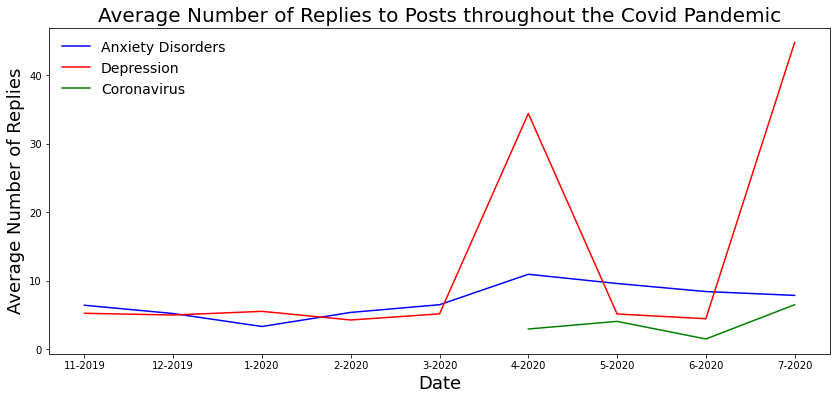

In [71]:
plt.figure(figsize=(14,6))
plt.plot(anxiety_date_group['year_month'], anxiety_date_group['num_replies_mean'], "b", label = "Anxiety Disorders")
plt.plot(depression_date_group['year_month'], depression_date_group['num_replies_mean'], "r", label = "Depression")
plt.plot(covid_date_group['year_month'], covid_date_group['num_replies_mean'], "g", label = "Coronavirus")
plt.legend(frameon=False, fontsize=14)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Average Number of Replies', fontsize=18)
plt.title("Average Number of Replies to Posts throughout the Covid Pandemic", fontsize=20)
plt.show()

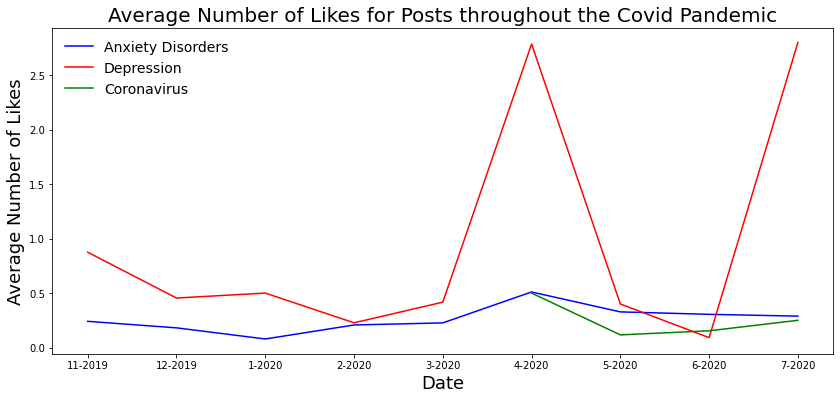

In [72]:
plt.figure(figsize=(14,6))
plt.plot(anxiety_date_group['year_month'], anxiety_date_group['post_likes_mean'], "b", label = "Anxiety Disorders")
plt.plot(depression_date_group['year_month'], depression_date_group['post_likes_mean'], "r", label = "Depression")
plt.plot(covid_date_group['year_month'], covid_date_group['post_likes_mean'], "g", label = "Coronavirus")
plt.legend(frameon=False, fontsize=14)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Average Number of Likes', fontsize=18)
plt.title("Average Number of Likes for Posts throughout the Covid Pandemic", fontsize=20)
plt.show()

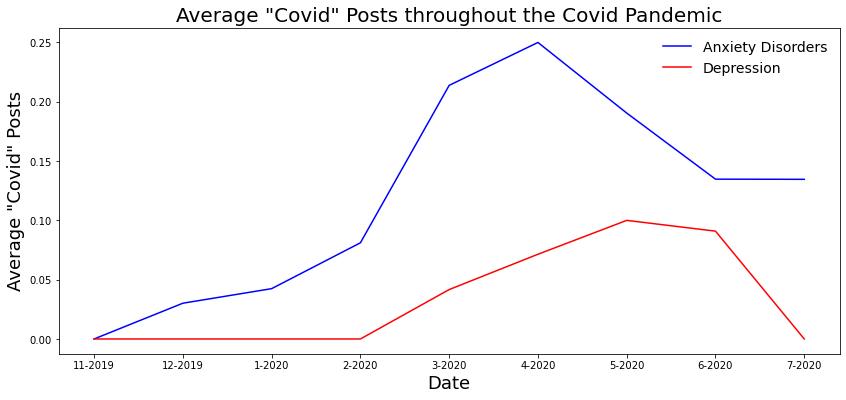

In [73]:
plt.figure(figsize=(14,6))
plt.plot(anxiety_date_group['year_month'], anxiety_date_group['covid_mean'], "b", label = "Anxiety Disorders")
plt.plot(depression_date_group['year_month'], depression_date_group['covid_mean'], "r", label = "Depression")
plt.legend(frameon=False, fontsize=14)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Average \"Covid\" Posts', fontsize=18)
plt.title("Average \"Covid\" Posts throughout the Covid Pandemic", fontsize=20)
plt.show()

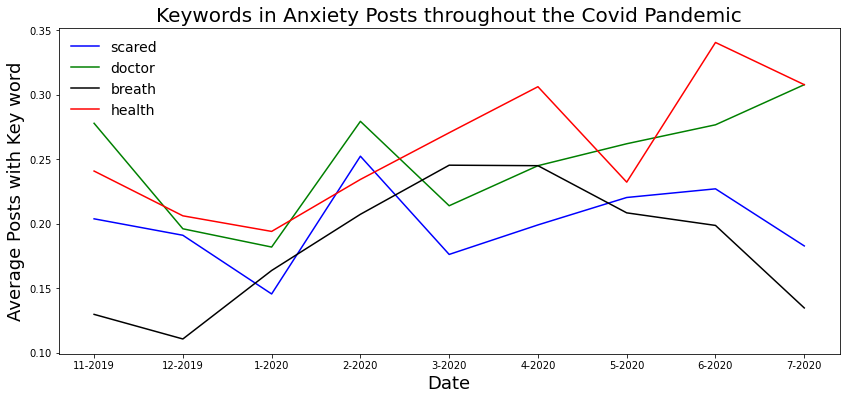

In [74]:
plt.figure(figsize=(14,6))
plt.plot(anxiety_date_group['year_month'], anxiety_date_group['scared_mean'], "b", label = "scared")
plt.plot(anxiety_date_group['year_month'], anxiety_date_group['doctor_mean'], "g", label = "doctor")
plt.plot(anxiety_date_group['year_month'], anxiety_date_group['breath_mean'], "black", label = "breath")
plt.plot(anxiety_date_group['year_month'], anxiety_date_group['health_mean'], "r", label = "health")
plt.legend(frameon=False, fontsize=14)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Average Posts with Key word', fontsize=18)
plt.title("Keywords in Anxiety Posts throughout the Covid Pandemic", fontsize=20)
plt.show()

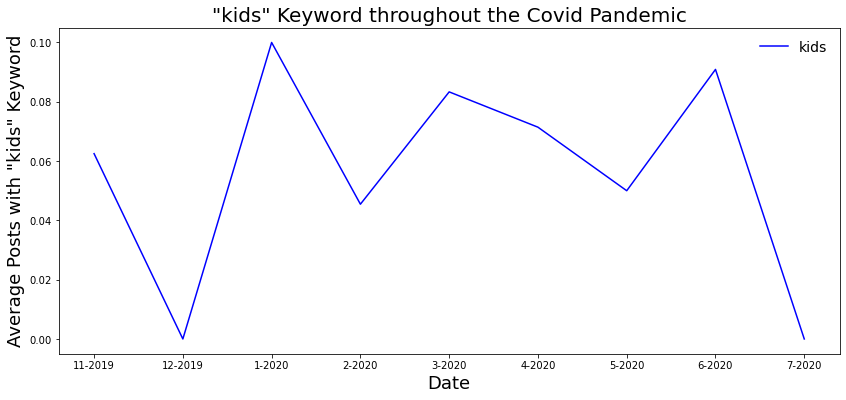

In [75]:
plt.figure(figsize=(14,6))
plt.plot(depression_date_group['year_month'], depression_date_group['kids_mean'], "b", label = "kids")
plt.legend(frameon=False, fontsize=14)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Average Posts with \"kids\" Keyword', fontsize=18)
plt.title("\"kids\" Keyword throughout the Covid Pandemic", fontsize=20)
plt.show()